In [ ]:
import pandas as pd 
import networkx as nx
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_files(path,sufix):
    """ Returns list of files on specified path with specified sufix
    """
    mypath = path
    return [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith(sufix)]

In [3]:
def is_unidirectional(graph, node1, node2):
    if graph.has_edge(node1, node2) == graph.has_edge(node2, node1):
        return False
    return True

In [4]:
def count_unidirectional_pairs(d_graph):
    edges = d_graph.edges()
    count = 0
    for edge_pair in edges:
        if is_unidirectional(d_graph, edge_pair[0], edge_pair[1]) == True:
            count += 1 
    return count

In [5]:
def fraction_unidirected_pairs(d_graph):
    return round(count_unidirectional_pairs(d_graph)/len(d_graph.edges()),2)

# Fraction of unidirectional links in the network over time (General)

In [6]:
files = get_files("../data/graphs/", "12_dir")

In [7]:
lst = []
for file in files: 
    d_graph = nx.read_gpickle(join("../data/graphs", file))
    lst.append(fraction_unidirected_pairs(d_graph))

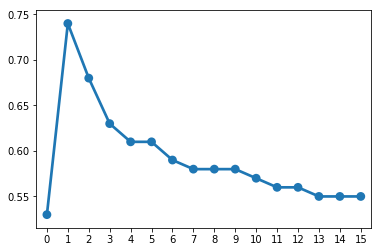

In [8]:
g = sns.pointplot([files.index(i) for i in files], lst)

# Fraction of unidirectional links (Male to Female and Female to Male) in the network over time (General)

In [9]:
d_graph = nx.read_gpickle(join("../data/graphs", files[15]))

In [10]:
def filter_for_gender(d_graph, gender_from, gender_to):
    edges = d_graph.edges()
#     print(len(edges))
    for edge_pair in edges:
        if d_graph.node[edge_pair[0]]["gender"] != gender_from or d_graph.node[edge_pair[1]]["gender"] != gender_to:
            edges.remove(edge_pair)
#     print(len(edges))
    return edges

In [11]:
def fraction_unidirected_pairs_gender(graph, gender_from, gender_to):
    edges = filter_for_gender(graph, gender_from, gender_to)
    dg = nx.DiGraph(edges)
    return count_unidirectional_pairs(dg)/count_unidirectional_pairs(graph)

In [12]:
def gender_fractions_over_time(files, gender_from, gender_to):
    lst = []
    for file in files: 
        d_graph = nx.read_gpickle(join("../data/graphs", file))
        lst.append(fraction_unidirected_pairs_gender(d_graph, gender_from, gender_to))
    return lst

In [13]:
fraction_unidirected_pairs_gender(d_graph, "male", "female")

0.723724534726707

In [14]:
fraction_unidirected_pairs_gender(d_graph, "female", "male")

0.7475253918863383

In [ ]:
m_f_lst = gender_fractions_over_time(files, "male", "female")

In [ ]:
m_f_lst

In [ ]:
fig,ax = plt.plot()
m_nodes = df['all'].m_nodes.values
f_nodes = df['all'].f_nodes.values

ax.plot(np.arange(1,33),stats.get_ratio_array(df['all']),marker="o", label="Global",color="black")
ax.plot(np.arange(1,33),stats.get_ratio_array(df['us']),marker="*", label="US",color="red")

#     ax2.set_legend(loc='upper right')
ax.set_ylim([0,0.18])
ax.set_yscale('linear')
ax.set_xlabel("year and month", fontsize=22)
ax.set_xticklabels(['2001_06','2003_06','2005_12','2008_06','2010_12','2013_06','2015_12'],rotation='vertical')
#     ax2.set_xticks(np.arange(1,33,1),minor=True)
ax.set_ylabel("female to male ratio", fontsize=22)
ax.set_xticks(np.arange(1,33,1),minor=True)
ax.legend(loc='lower left', fontsize=15)